#Human investing & investment techniques
Investing money in the market seems like a good idea theoretically. The homo economicus surely would profit from the market returns. Unfortunately there is some difference between the homo sapiens and its theoratical sibling homo economicus.

We humans suffer from biases.
To name one: the extrapolation bias, i.e., the expected continuation of past performance, which leads us to be overly optimistic when the market goes up or overly pessimistic when the market goes down.

Because of our shortcomings many have searched for the formula that would make them rich. A formula that tells you which stocks to buy or sell and will generate a high return for you with a minimal amount of risk.

This sounds to good to be true and it certainly is. Common sense tells us there can be no Holy Grail ultimate formula and we are not searching for one in this project. Rather, we want to investigate and compare different basic investing strategies and give the reader a chance to test his or her own behaviours. Finally, we build and test a simple systematic investment strategy that aims to reduce risk; the robust strategy introduced by Gray, Vogel and Foulke (2015).This strategy accepts the fact that consistently achieving excess returns is exceedingly hard (and sometimes impossible, as multiple studies have shown (Cremers et al., 2015)) and instead focuses on reducing risks and mitigating large drawdowns. We expand on this strategy by attempting to optimize it for maximum return and minimum volatility.*kursiver Text*

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [3]:
# Import data
with open("data/SSMI_monthly.csv") as csv_file:
  ssmi_monthly = pd.read_csv(csv_file, delimiter=",")

with open("data/GDAXI_monthly.csv") as csv_file:
  dax_monthly = pd.read_csv(csv_file, delimiter=",")

with open("data/GSPC_monthly.csv") as csv_file:
  spy_monthly = pd.read_csv(csv_file, delimiter=",")

with open("data/HSI_monthly.csv") as csv_file:
  hsi_monthly = pd.read_csv(csv_file, delimiter=",")

We import the data we retrieved from https://finance.yahoo.com of the SMI (Swiss index), DAX (German index), S&P 500 (US index), and HSI (Hong Kong index), from January 1990 until May 2021.

In [5]:
#data cleaning
spy_monthly=spy_monthly[::-1].reset_index(drop=True)
#changing size of dfs for the first part
spy_monthly0=spy_monthly.iloc[12:,:].reset_index(drop=True).copy()
dax_monthly0=dax_monthly.iloc[:,:].reset_index(drop=True).copy()
hsi_monthly0=hsi_monthly.iloc[12:377,:].reset_index(drop=True).copy()
ssmi_monthly0=ssmi_monthly.iloc[1:,:].reset_index(drop=True).copy()

First, instead of the price the indexes are worth, we want the return of the indexes, meaning the change in price compared to last month.

In [6]:
def conv_to_return (index):

  """function that converts a price series into a return series"""
  
  index= index.loc[:,("Date", "Close")]
  index["Close_1"] = index["Close"].shift(1)
  index["return"] = index.apply(lambda r: (r["Close"] / r["Close_1"]) - 1, axis=1)
  index = index.loc[1:,("Date", "return")]
  return index


In [7]:
#create dataframes with the only the date and the corresponding return
ssmi_monthly_return0=conv_to_return(ssmi_monthly0)
dax_monthly_return0=conv_to_return(dax_monthly0)
hsi_monthly_return0=conv_to_return(hsi_monthly0)
spy_monthly_return0=conv_to_return(spy_monthly0)


Now we create a function that will help us plot the return of the indexes

In [8]:

def plotfunction(returndf,column="return", title="",legend=np.nan, size= (10, 10)):

  """function to plots the returns and other columns """
  if type(returndf)==list:
    plt.rcParams["figure.figsize"] = size
    for df,i in zip(returndf,legend):
      plt.plot(df["Date"],df[column], label=i)
      
  else:
    plt.rcParams["figure.figsize"] = size
    plt.plot(returndf["Date"],returndf[column], label=legend)

  
  plt.ylabel('return')
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.title(title)
  plt.legend()

  return plt.show

<function matplotlib.pyplot.show>

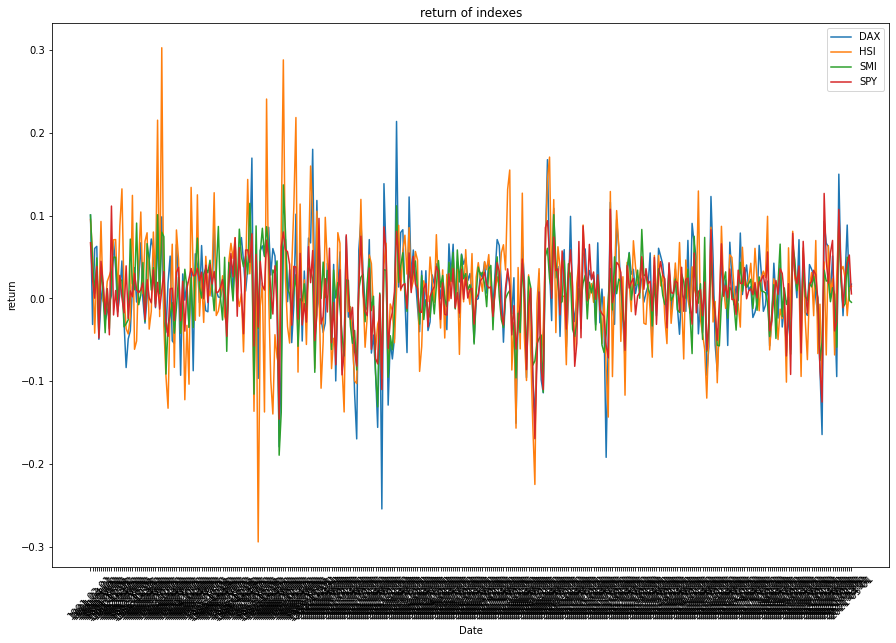

In [9]:
plotfunction(returndf=[dax_monthly_return0, hsi_monthly_return0, ssmi_monthly_return0, spy_monthly_return0],column="return",title="return of indexes",legend=["DAX","HSI","SMI","SPY"], size=(15,10))


What we can see from the different returns is that they fluctuate quite a bit and can go into heavily positive or negative returns.

#buy and hold
As a benchmark we take the buy and hold technique. It is the least creative one but still most of the time outperforms any fancy and complicated formula for investing. The downside of the buy and hold technique is that sometime the market goes down quite a bit and the investors needs to have the patience and the nerves to not sell at the lowpoint and lose money. In the long run if stocks are just held the return of buy and is one of the highest one can wish to achieve.

In [10]:
def buy_and_hold(df_input, start_investment):

  """will create a df with additional "buy_hold" column that will give the returns 
  for the buy and hold investment technique with an initial investment= start_investment"""
  df=df_input.copy()
  df["buy_hold"]=np.isnan

  df["buy_hold"][1]=start_investment
  for i in range(2,len(df)+1):
    df["buy_hold"][i]= df["buy_hold"][i-1]*(1+df["return"][i])
  return df





In [11]:
#create a dataframe with a buy and hold column for each index
ssmi_buyNhold=buy_and_hold(ssmi_monthly_return0,100)
dax_buyNhold=buy_and_hold(dax_monthly_return0,100)
hsi_buyNhold=buy_and_hold(hsi_monthly_return0,100)
spy_buyNhold=buy_and_hold(spy_monthly_return0,100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
#creating a combined and equally weighted buy and hold portfolio or the 4 indexes
combination= ssmi_buyNhold.copy()
combination["buy_hold"]=(ssmi_buyNhold["buy_hold"]+dax_buyNhold["buy_hold"]+hsi_buyNhold["buy_hold"]+spy_buyNhold["buy_hold"])/4


<function matplotlib.pyplot.show>

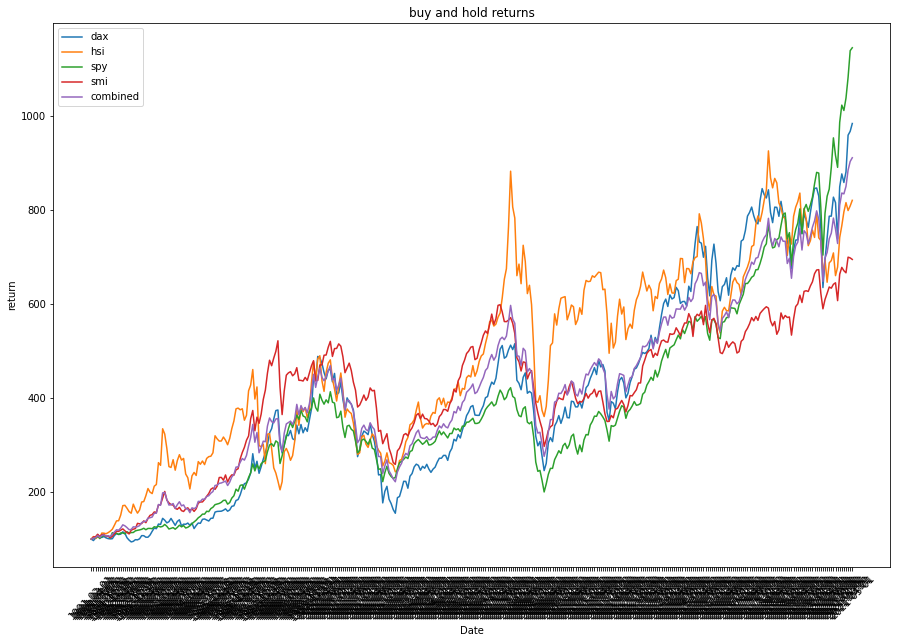

In [13]:
plotfunction([dax_buyNhold,hsi_buyNhold,spy_buyNhold,ssmi_buyNhold,combination], column="buy_hold",title="buy and hold returns",legend=["dax","hsi","spy","smi","combined"],size=(15,10))

There are differences in returns depending on the indexes. Over the long run they all offer great returns from 8x up to 12x. In the short run however there are big downswings that create short term losses up to 50%.

#Dollar-cost averaging
Another basic but also effective investing technique is the dollar-cost averaging. The idea is to periodically (oftentimes that is monthly) invest a fixed amount in the market. That way one can profit from the downswings of the market, on the other hand one also buys into the market when its overpriced or before a crash and then loses money when prices sink but those are only short term losses. On the long run the market is said to always go up.

Psychologically and functionally the dollar-averaging technique brings the advantage of automizing the decision to invest in the market and making it a habit and thus help the investor stay consistent and not buy or sell too much at the wrong time. Also compared to the buy and hold approach the investments can be smaller in size but over time those small investments add up. Investing more often in smaller amounts makes more sense for many investors, who e.g., earn a monthly salary.

In [14]:

def reinvest (df_input, money=1000, amount=1):

  """ the function will reinvest the amount each month until you run out of money"""
  
  title="reinvest_"+str(amount)+"_monthly"
  
  df= df_input.copy()
  df[title]=np.isnan
  df[title][1]=money
  
  invested=amount
  bankaccount= money-amount
  
  for i in range(2,len(df)+1):
    invested= invested*(1+df["return"][i])
    df[title][i]= bankaccount +invested*(1+df["return"][i])
    
    if bankaccount==0:
      continue

    bankaccount = bankaccount - amount
   
    if bankaccount<0:
      invested= invested + bankaccount + amount
      bankaccount=0
      continue

    invested = invested + amount
    

  return df



In [15]:
smi_reinvest=reinvest(ssmi_monthly_return0,100,1)
dax_reinvest=reinvest(dax_monthly_return0,100,1)
spy_reinvest=reinvest(spy_monthly_return0,100,1)
hsi_reinvest=reinvest(hsi_monthly_return0,100,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show>

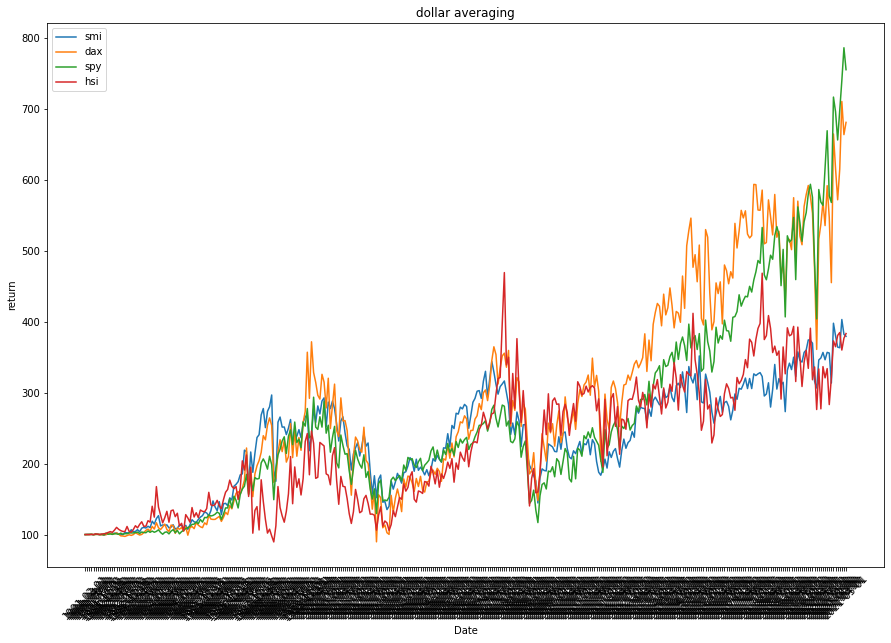

In [16]:
plotfunction([smi_reinvest,dax_reinvest,spy_reinvest,hsi_reinvest], column="reinvest_1_monthly",title="dollar averaging", legend=["smi","dax","spy","hsi"],size=(15,10))

Naturally the returns are lower (4x - 8x) than with the buy and hold approach (8x - 12x) where you invested all your money in the beginning. But rarely do people start off investing all their available capital from the start. Furthermore people's wealth changes over time and they might reinvest at a later point.

Dollar-averaging is an extension of the buy and hold approach. You are still not selling for short term profit but you are, instead of just holding your investments in the market, buying more regularly. For people with a monthly paycheck the dollar-averaging can lead to the good habit of setting aside money that will be invested regardless of the current market situation. This diminishes biases by regularizing investment process and making it a habit. 

#Timing the market
Timing the market means investing or retrieving money from the market in such a way that one can outperfrom the market by buying before an upswing in price and selling before a crash.

Using this approach implies that one thinks they have some insights or higher intelligence that enables them to predict the future better than the rest of us. 
Most people are wrong thinking that way and end up underperforming the market, but you might just be the exeption. You can try your luck or skills on the function below and see how well you do.

In [17]:
def timing_market (df,money):
  """ input a df with the monthly returns in the "return column" and choose how much money you have on your bank.
  The function lets you choose each month how much you'll invest or retrieve from the market"""

  print("you have ", money, " in the bank")
  initial_money= money
  title="reinvest_monthly"
  df[title]=np.isnan
  df[title][1]=money
  invested= 0
  
  for i in range(2,len(df)+1):
    amount= (input("how much do you want to invest/retrieve"))
    while (amount.isnumeric()==False) and amount[1:].isnumeric() == False:
      print ("wrong input, must be of type int")
      amount= (input("how much do you want to invest/retrieve"))
    amount=int(amount)
    money= money - amount
    invested= invested + amount
    
    while (money < 0) or (invested < 0):

      if invested < 0:
        print("not enough funds left, you have", invested - amount, "left in the market")
        amount2=(input("how much do you want to invest/retrieve"))
        while (amount2.isnumeric()==False) and (amount2[1:].isnumeric() == False):
          print ("wrong input, must be of type int")
          amount2= (input("how much do you want to invest/retrieve"))
        amount2=int(amount2)
        new_invested= invested - amount + amount2
        new_money = money + amount - amount2

      if money< 0:
       print("not enough funds left, you have", money + amount, "left on the bank")
       amount2=(input("how much do you want to invest/retrieve"))
       while (amount2.isnumeric()==False) and amount2[1:].isnumeric() == False:
         print ("wrong input, must be of type int")
         amount2= (input("how much do you want to invest/retrieve"))
      amount2=int(amount2)
      
      new_money=money + amount -amount2
      new_invested= invested - amount + amount2
      if (new_money >= 0) and (new_invested >= 0):
         invested= new_invested
         money=new_money

     
    invested= invested*(1+df["return"][i])
    df[title][i]= money + invested
    print( "value of investments: ",invested, "return: ",df["return"][i], "total money: ", df[title][i], "money on bank: ",money)
  end_money=df[title][len(df)]
  return (print("you have made, {money}% profit, over {length} periods".format(money=end_money/initial_money-1, length=len(df)-1)),df,plotfunction(df,column=title,title="timing the market", legend= "your performance"))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


you have  100  in the bank
how much do you want to invest/retrieve50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


value of investments:  52.239186520377615 return:  0.044783730407552236 total money:  102.23918652037761 money on bank:  50
how much do you want to invest/retrieve20
value of investments:  72.6815377023219 return:  0.006123424186393667 total money:  102.6815377023219 money on bank:  30
how much do you want to invest/retrieve20
value of investments:  97.22207012569888 return:  0.048990689364266204 total money:  107.22207012569888 money on bank:  10
how much do you want to invest/retrieve-50
value of investments:  45.14688155554049 return:  -0.043945311263028364 total money:  105.14688155554049 money on bank:  60
how much do you want to invest/retrieve30
value of investments:  77.98695326513948 return:  0.03779360701082335 total money:  107.98695326513948 money on bank:  30
you have made, 0.07986953265139474% profit, over 5 periods


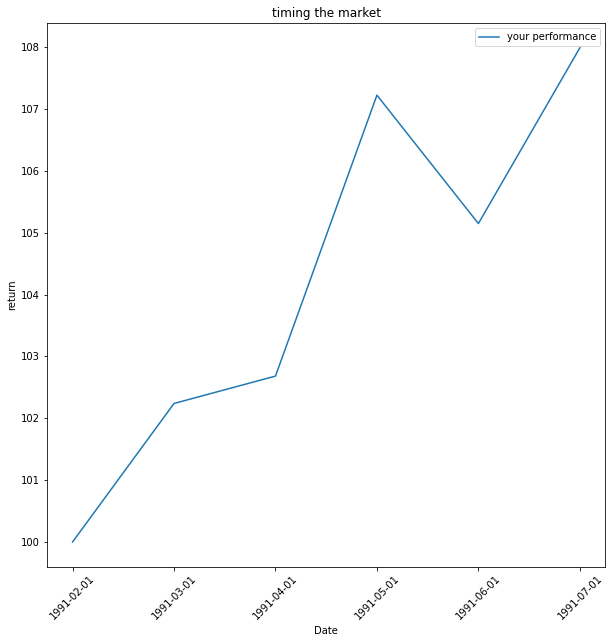

In [18]:
#Try your skills on some months of SMI.
#see how much you can do with 1000 chf
timespan=5

timing_result=timing_market(ssmi_monthly_return0.iloc[:(timespan+1),:],100)

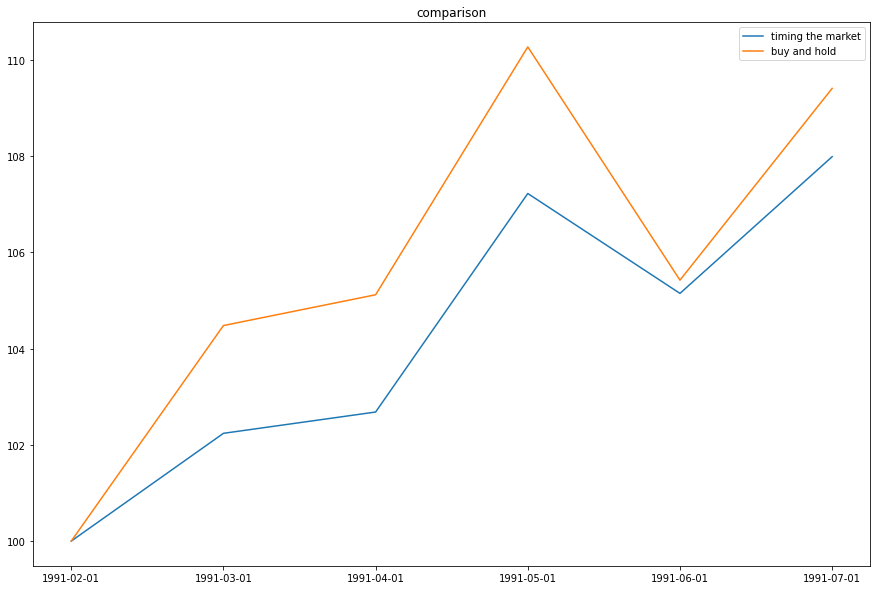

In [19]:
# Compare the results to buying and holding the index
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(timing_result[1]["Date"],timing_result[1]["reinvest_monthly"],label="timing the market")
plt.plot(ssmi_buyNhold.iloc[0:(timespan+1),0],ssmi_buyNhold.iloc[:(timespan+1),2], label="buy and hold")
plt.title("comparison")
plt.legend()

We were not able to outperform the buy and hold method by timing the market. We are aware that more information can be taken into account to better time the market but this should show that even though the market can be volatile at times it is very difficult if not impossible to predict which way it will go in the future.

Also timing the market can lead to more transactions if one wants to make a profit from shortterm fluctuations. With an increase in transactions the transaction fee would also have to be taken into account.

# Basis for the analysis
One approach to take to investing is to just put everything into one or multiple products or indices, be it equally weighted between different products or weighted according to an arbitrary “gut feeling”. Such an approach, especially when applied to multiple broad indices, already has major diversification advantages over simply picking one or a small number of stocks to invest in.

According to portfolio theory (e.g., Bodie et al., 2020) investors are only compensated for the systematic risk they take by providing capital to companies, not the idiosyncratic risk that might be associated with individual companies. “How are the two types of risk different?” you might ask. Idiosyncratic risk is risk associated with the unique operations of a company. Let us say a company produces paper products from wood they source from their own forest. Such a company might have idiosyncratic risks with regards to this forest as their major source of raw materials. Were the forest to burn down or to be befallen by insects that kill all the trees, the company might have to make costly purchases of wood on the market or to seize their operations entirely. This risk is unique to the company and will most likely not be correlated at all to other companies’ idiosyncratic risk. Such risk can (at least in theory) be completely diversified away. By holding a wide array of other companies’ stock that are not exposed to the same type of risk, the investor will not suffer major losses of their portfolio should some idiosyncratic risk incur losses for one of the companies in the portfolio. Systematic risk or market risk on the other hand is risk that affects all companies in a market in the same way. Examples for this are macroeconomic factors such as inflation. Because these risks cannot be mitigated by diversifying a portfolio, theory tells us that this risk must be compensated with returns to make stock market investments feasible for rational investors.
Coming back to investing in very diversified indices this means that the investor is very insensitive to idiosyncratic risks as he or she has a wide array of assets that offset losses or subpar returns from individual stocks in the portfolio.


# Implementation of portfolio return function
The function ```portfolio_return(portfolio, weights, returns)``` calculates the returns of a portfolio based on return series of the individual assets in the portfolio and their weights over time.

```portfolio``` a data frame with the portfolio, weights and returns column-wise per asset.

```weights``` a list of column names that specify the asset weights.

```returns``` a list of column names that specify the asset returns.

In [20]:
# Portfolio return function
def portfolio_return(portfolio, weights, returns):

  """function that calculates the return of a given portfolio"""

  pf_return = pd.DataFrame(portfolio["Date"])
  pf_return.insert(loc=1, column="portfolio_return", value=pd.Series([0 for i in range(len(portfolio["Date"]))]))
  for i in range(len(weights)):
    pf_return["portfolio_return"] += portfolio[weights[i]] * portfolio[returns[i]]
  return pf_return

In [21]:
# Create test data frame
dax_monthly_return = conv_to_return(dax_monthly)
ssmi_monthly_return = conv_to_return(ssmi_monthly)

weights = pd.concat([ssmi_monthly["Date"], pd.Series([0.5] * len(ssmi_monthly["Date"]), name="SSMI_weight"), pd.Series([0.5] * len(ssmi_monthly["Date"]), name="DAX_weight")], axis=1)
test_portfolio = pd.merge(weights, ssmi_monthly_return, how="inner", on="Date")
test_portfolio = pd.merge(test_portfolio, dax_monthly_return, how="inner", on="Date")
test_portfolio = pd.merge(test_portfolio, ssmi_monthly.loc[:,("Date", "Close")], how="inner", on="Date")
test_portfolio = pd.merge(test_portfolio, dax_monthly.loc[:,("Date", "Close")], how="inner", on="Date")
test_portfolio.columns = ["Date", "SSMI_weight", "DAX_weight", "SSMI_return", "DAX_return", "SSMI_price", "DAX_price"]

# Index the prices to 100
for indx in ["SSMI_price", "DAX_price"]:
  test_portfolio[indx] = (test_portfolio[indx] / test_portfolio[indx][0]) * 100

test_portfolio.head(n=5)

,Date,SSMI_weight,DAX_weight,SSMI_return,DAX_return,SSMI_price,DAX_price
0,1991-02-01,0.5,0.5,0.100676,0.100826,100.000000,100.000000
1,1991-03-01,0.5,0.5,0.044784,-0.031404,104.478373,96.859599
2,1991-04-01,0.5,0.5,0.006123,0.060416,105.118138,102.711499
3,1991-05-01,0.5,0.5,0.048991,0.062911,110.267949,109.173193
4,1991-06-01,0.5,0.5,-0.043945,-0.049316,105.422189,103.789193


In [22]:
# Call the portfolio_return function on the test portfolio
test_portfolio_return = portfolio_return(test_portfolio, ["SSMI_weight", "DAX_weight"], ["SSMI_return", "DAX_return"])
print(test_portfolio_return.head(n=5))

         Date  portfolio_return
0  1991-02-01          0.100751
1  1991-03-01          0.006690
2  1991-04-01          0.033270
3  1991-05-01          0.055951
4  1991-06-01         -0.046631


# A simple systematic investment approach
With respects to the systematic risk of equity investments the investor is of course still subject to broad market drawdowns that occur for example in a market crisis. They might want to take the diversification to even greater levels and look outside of equities to other asset classes that are somewhat uncorrelated to broad market crises. Examples for other assets include fixed income securities such as bonds or commodities such as rare metals. While this is a completely valid and widely practiced approach, such less risky assets generally have lower returns than equities (again, the investor is compensated for the amount of risk he or she takes on).

Another approach is to try to “time the market” – that is to put money into a portfolio when the investor thinks the outlook for the market is promising and to take it back out when the future looks less promising. If an investor were to solely rely on gut feeling about the future of the market, outcomes might vary greatly, and research has shown that both “mom and pop” investors as well as highly sophisticated institutions are generally not able to consistently generate alpha (that is to outperform the buy-and-hold approach) (Cremers et al., 2015).

If there were a systematic way of defining rules to describe whether the market outlook is conducive to investing or whether capital should be taken out of the market, results would be more testable and consistent. This is what Gray, Vogel and Foulke (2015) suggest in their research. They propose a “robust” approach to investing that calculates two signals based on past price data of a financial instrument. Their approach to decide whether or not to invest is then based on a mixture of the two signals: if both suggest a positive future performance of a product, the investor should invest fully, if only one of the signals suggests positive future performance only half the money should be invested and if none of them signal positively, the investor should not invest at all.

- The first of these signals is based on a moving average over the n past periods of prices compared to the latest period. If the latest price is higher than the moving average, this suggests an upwards trend and a positive signal.

- The second of the signals is a momentum indicator. It calculates the total return of a product over the past n periods. If this return is positive, this indicates a positive momentum in the product's price and a positive investment signal.

- Finally, the robust rule is the weighted average of these two signals, indicating whether to invest all of the capital, half of it or none of it.


# Implementation of a Simple Moving Average function
The function ```sma(time_series, n)``` takes a time series of returns or prices and an argument for the number of periods to calculate a simple moving average on.

```time_series``` time series of returns or prices to calculate a simple moving average.

```n``` an integer of the number of periods to base the simple moving average on.

In [23]:
### Simple moving average function
def sma(time_series, n):

  """function that calculates a moving average on a given time series"""

  time_series = time_series.rolling(n).mean()
  return time_series

In [24]:
### Call the SMA function on the returns of the test portfolio
print(sma(test_portfolio_return["portfolio_return"], 10).tail(n=5))

359    0.023137
360    0.017764
361    0.020304
362    0.016404
363    0.017218
Name: portfolio_return, dtype: float64


# Implementation of a momentum function
The function ```momentum(time_series, n, rf)``` calculates the momentum of a time series with the specified window and risk-free rate parameters.

```time_series``` a time series of returns on which to calculate the momentum

```n``` the number of periods in the calculation window

```rf``` the risk-free rate to use in the calculations. Default is 0.

In [25]:
# Momentum function
def momentum(time_series, n, rf=0):

  """function that calculates the momentum in a given price series"""

  mom = [np.NaN] * n
  for i in range(n, time_series.shape[0]):
    mom.append((time_series[i] / time_series[i - n]) - 1 - rf)
  time_series = pd.Series(mom)
  return time_series

In [26]:
### Call the momentum function on the returns of the test portfolio
print(momentum(test_portfolio_return["portfolio_return"], 10).tail(n=5))

359   -0.855666
360   -0.844347
361    0.578844
362   -0.925993
363   -4.372165
dtype: float64


# Implementation of a robust indicator function
The function ```robust(time_series, sma_n, mom_n, mix)``` calculates a robust trading signal for every month based on a combination of moving average and momentum.

```time_series``` a time series of prices for which to calculate the signal

```sma_n``` the number of periods on which to calculate the simple moving average

```mom_n``` the number of periods on which to calculate the momentum

```mix``` the weight to give to the simple moving average (momentum recieves the weight 1 - ```mix```)

In [27]:
# Robust indicator function
def robust(time_series, sma_n, mom_n, mix):

  """function that calculates the robust signals for a given time series"""

  moving_average = sma(time_series, sma_n)
  moving_average = np.array([1 if moving_average[x] - time_series[x] > 0 else 0 for x in range(len(time_series))])
  mom = momentum(time_series, mom_n)
  mom = np.array([1 if mom[x] > 0 else 0 for x in range(len(time_series))])
  robust_strat = moving_average * mix + mom * (1 - mix)
  return robust_strat

In [28]:
# Call the robust function on the prices of SSMI_monthly
print(robust(ssmi_monthly["Close"], 12, 12, 0.5))

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1.  0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.5 1.  0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.  0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  1.  1.  1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  1.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.
 1.  1.  0.5 0.5 0.5 1.  0.  0.5 0.  0.5 0.  0.5 1. 

# Applying the robust signals to a trading strategy
In the following, the generated robust signals shall be applied to make trading decisions on a portfolio consisting of the SMI and DAX indices. As previously described, the signals indicate whether an investor should invest fully, half or not at all. These signals are then applied to the equal-weighted portfolio. Through this method, the investor has a robust way to decide which index two invest into.

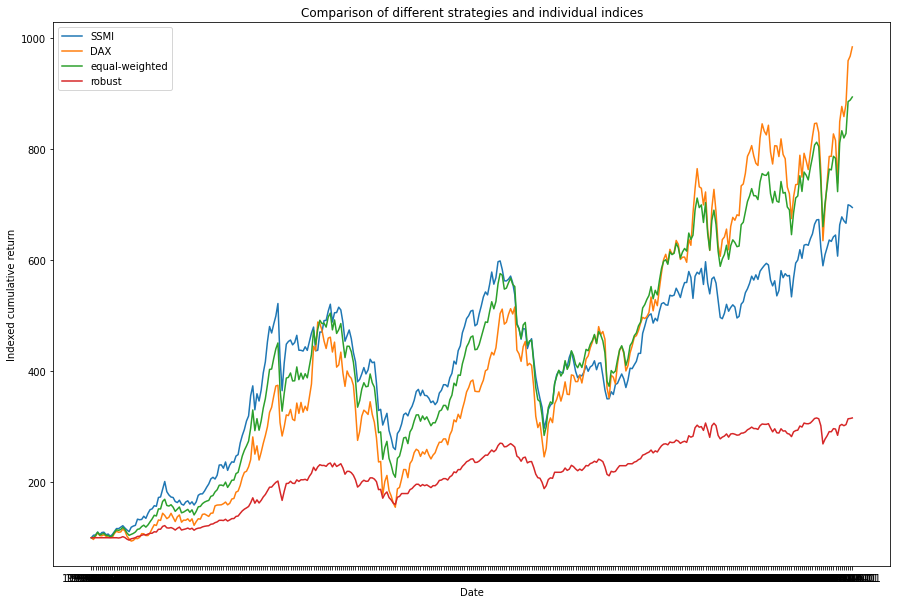

In [29]:
# Calculate cumulative return of equal weighted DAX and SSMI portfolio (= buy and hold)
test_portfolio["equal_weighted_return"] = portfolio_return(test_portfolio, ["SSMI_weight", "DAX_weight"], ["SSMI_return", "DAX_return"])["portfolio_return"]
test_portfolio.loc[0, "equal_weighted_return"] = 0 # prepare for indexing to 100

# Calculate the robust weights for the test portfolio
test_portfolio["SSMI_robust_weight"] = pd.Series(robust(test_portfolio["SSMI_price"], 12, 12, 0.5)).shift(1) * test_portfolio["SSMI_weight"]
test_portfolio["DAX_robust_weight"] = pd.Series(robust(test_portfolio["DAX_price"], 12, 12, 0.5)).shift(1) * test_portfolio["DAX_weight"]
test_portfolio.loc[0, ("SSMI_robust_weight", "DAX_robust_weight")] = 0 # Correct for the shift of robust signals
test_portfolio["robust_return"] = portfolio_return(test_portfolio, ["SSMI_robust_weight", "DAX_robust_weight"], ["SSMI_return", "DAX_return"])["portfolio_return"]

# Construct results of buy and hold of equal weighted portfolio vs. the robust strategy vs. the individual indices
test_strategy = pd.concat([test_portfolio["Date"], test_portfolio["SSMI_price"], test_portfolio["DAX_price"], 100 * np.cumprod(1 + test_portfolio["equal_weighted_return"]), 100 * np.cumprod(1 + test_portfolio["robust_return"])], axis=1)

# Plot the results
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(test_strategy["Date"], test_strategy["SSMI_price"], label="SSMI")
plt.plot(test_strategy["Date"], test_strategy["DAX_price"], label="DAX")
plt.plot(test_strategy["Date"], test_strategy["equal_weighted_return"], label="equal-weighted")
plt.plot(test_strategy["Date"], test_strategy["robust_return"], label="robust")
plt.xlabel("Date")
plt.ylabel("Indexed cumulative return")
plt.title("Comparison of different strategies and individual indices")
plt.legend()
plt.show()

# Hold up - the robust strategy performs the worst by far?!?
From the graphical comparison alone it becomes very clear that the cumulative return of the robust strategy is the worst out of the bunch. Lower than the equally weighted portfolio and even lower than the individual indices themselves. "How can this be a sound investment strategy?" you might ask. The answer lies in the arguably most important aspect of investing besides return - the risk.

## Managing risk
This is where the "robust" element of the strategy proposed by Gray, Vogel and Foulke (2015) comes into play. While the raw performance of buy-and-hold might look promising, it is not always optimal for an investor. During a crisis they can experience large drawdowns, as is visible for example during the 2008 financial crisis. The robust strategy has been empirically proven to help mitigate some of the volatility an investor might experience. To put a number to that, in the following the cumulative returns, volatilities and maximum drawdowns of the different strategies shall be calculated.

In [30]:
# Calculate the returns, volatilites and maximum drawdown of the strategies and indices
pd.DataFrame({"strategy": ["SSMI", "DAX", "equal-weighted", "robust"],
              "total_return": test_strategy.iloc[test_strategy.shape[0] - 1, 1:].tolist(),
              "return_volatility": (np.var(test_portfolio.loc[:,("SSMI_return", "DAX_return", "equal_weighted_return", "robust_return")]) ** 0.5).tolist(),
              "max_drawdown": (test_strategy.iloc[:, 1:5] / test_strategy.iloc[:, 1:5].cummax() - 1).cummin().min().tolist()})

,strategy,total_return,return_volatility,max_drawdown
0,SSMI,694.934442,0.042690,-0.504145
1,DAX,984.155492,0.058555,-0.682928
2,equal-weighted,893.930690,0.046649,-0.585913
3,robust,315.795312,0.025099,-0.318214


As is visible from the calculations, even though the robust strategy returns significantly less over the entire period, the returns are also much less volatile and the maximum drawdowns (the worst-case scenarios) are much less grave than those of the individual indices or the equally weighted portfolio. This means that the robust strategy is especially relevant to investors who are more risk-averse or do not have a very long time horizon to invest (e.g. if they retire in the next 5 years and want to invest some of their money until retirement).

# Final portfolio of four indices
In order to add more diversification potential to the already diversified indices, two more broad market indices are added to the portfolio: the DAX and HSI indices. Through the geographic diversification, the potential to gain diversification by investing in decorrelated assets as well as the potential for higher market returns in less developed markets (the Hong Kong Hang Seng Index) is enabled.

In reality, an index is of course just a measure of the prices of a basket of securities which investors cannot buy outright. There are however many so called index funds that replicate the underlying portfolio in a tradeable security. This is what an investor would actually trade in the real world, were they to follow a similar strategy as proposed. Because these products have unique properties such as different payout schemes for dividends and different cost structures, all the calculations in this project are performed on the indices themselves - as if they were tradable products. This eliminates variables that might affect the results in ways that are not condusive for the central points of systematic investment and risk management that this project aims to analyze.

In [31]:
# Build the final portfolio of indices
hsi_monthly_return = conv_to_return(hsi_monthly)
spy_monthly_return = conv_to_return(spy_monthly)

portfolio = pd.merge(ssmi_monthly_return, spy_monthly_return, how="inner", on="Date")
portfolio = pd.merge(portfolio, dax_monthly_return, how="inner", on="Date")
portfolio = pd.merge(portfolio, hsi_monthly_return, how="inner", on="Date")
portfolio = pd.merge(portfolio, ssmi_monthly.loc[:,("Date", "Close")], how="inner", on="Date")
portfolio = pd.merge(portfolio, spy_monthly.loc[:,("Date", "Close")], how="inner", on="Date")
portfolio = pd.merge(portfolio, dax_monthly.loc[:,("Date", "Close")], how="inner", on="Date")
portfolio = pd.merge(portfolio, hsi_monthly.loc[:,("Date", "Close")], how="inner", on="Date")

portfolio = pd.merge(pd.concat([pd.Series(portfolio["Date"], name="Date"),
                                pd.Series([0.25] * len(portfolio["Date"]), name="SSMI_weight"),
                                pd.Series([0.25] * len(portfolio["Date"]), name="SPY_weight"),
                                pd.Series([0.25] * len(portfolio["Date"]), name="DAX_weight"),
                                pd.Series([0.25] * len(portfolio["Date"]), name="HSI_weight")], axis=1),
                     portfolio, how="inner", on="Date")
portfolio.columns = ["Date", "SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight", "SSMI_return", "SPY_return", "DAX_return", "HSI_return", "SSMI_price", "SPY_price", "DAX_price", "HSI_price"]
portfolio_backup = portfolio.copy()
portfolio.head(n=5)

,Date,SSMI_weight,SPY_weight,DAX_weight,HSI_weight,SSMI_return,SPY_return,DAX_return,HSI_return,SSMI_price,SPY_price,DAX_price,HSI_price
0,1991-02-01,0.25,0.25,0.25,0.25,0.100676,0.067281,0.100826,0.095282,1578.699951,367.07,1564.449951,3552.0
1,1991-03-01,0.25,0.25,0.25,0.25,0.044784,0.022203,-0.031404,0.054336,1649.400024,375.22,1515.319946,3745.0
2,1991-04-01,0.25,0.25,0.25,0.25,0.006123,0.000320,0.060416,-0.041923,1659.500000,375.34,1606.869995,3588.0
3,1991-05-01,0.25,0.25,0.25,0.25,0.048991,0.038605,0.062911,0.033166,1740.800049,389.83,1707.959961,3707.0
4,1991-06-01,0.25,0.25,0.25,0.25,-0.043945,-0.047893,-0.049316,-0.010521,1664.300049,371.16,1623.729980,3668.0


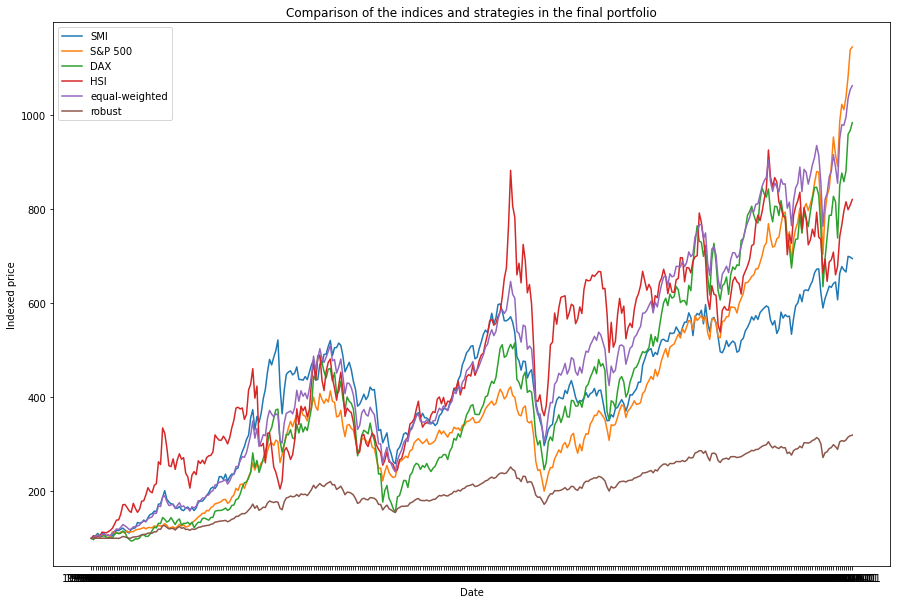

In [32]:
# Index the prices
for indx in ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"]:
  portfolio[indx] = (portfolio[indx] / portfolio[indx][0]) * 100

# Calculate cumulative return of equal weighted portfolio (= buy and hold)
portfolio["equal_weighted_return"] = portfolio_return(portfolio, ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"])["portfolio_return"]
portfolio.loc[0, "equal_weighted_return"] = 0 # prepare for indexing to 100

# Calculate the robust weights for the test portfolio
portfolio["SSMI_robust_weight"] = pd.Series(robust(portfolio["SSMI_price"], 12, 12, 0.5)).shift(1) * portfolio["SSMI_weight"]
portfolio["SPY_robust_weight"] = pd.Series(robust(portfolio["SPY_price"], 12, 12, 0.5)).shift(1) * portfolio["SPY_weight"]
portfolio["DAX_robust_weight"] = pd.Series(robust(portfolio["DAX_price"], 12, 12, 0.5)).shift(1) * portfolio["DAX_weight"]
portfolio["HSI_robust_weight"] = pd.Series(robust(portfolio["HSI_price"], 12, 12, 0.5)).shift(1) * portfolio["HSI_weight"]
portfolio.loc[0, ("SSMI_robust_weight", "SPY_robust_weight", "DAX_robust_weight", "HSI_robust_weight")] = 0 # Correct for the shift of robust signals
portfolio["robust_return"] = portfolio_return(portfolio, ["SSMI_robust_weight", "SPY_robust_weight", "DAX_robust_weight", "HSI_robust_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"])["portfolio_return"]

# Construct results of buy and hold of equal weighted portfolio vs. the robust strategy vs. the individual indices
strategy = pd.concat([portfolio["Date"], portfolio["SSMI_price"], portfolio["SPY_price"], portfolio["DAX_price"], portfolio["HSI_price"], 100 * np.cumprod(1 + portfolio["equal_weighted_return"]), 100 * np.cumprod(1 + portfolio["robust_return"])], axis=1)

plt.plot(strategy["Date"], strategy["SSMI_price"], label="SMI")
plt.plot(strategy["Date"], strategy["SPY_price"], label="S&P 500")
plt.plot(strategy["Date"], strategy["DAX_price"], label="DAX")
plt.plot(strategy["Date"], strategy["HSI_price"], label="HSI")
plt.plot(strategy["Date"], strategy["equal_weighted_return"], label="equal-weighted")
plt.plot(strategy["Date"], strategy["robust_return"], label="robust")
plt.xlabel("Date")
plt.ylabel("Indexed price")
plt.title("Comparison of the indices and strategies in the final portfolio")
plt.legend()
plt.show()

## Risk measures in the final portfolio
To compare the risks and returns of the strategies applied to the final portfolio, they are calculated below.

In [33]:
# Calculate the returns, volatilites and maximum drawdown of the strategies and indices
pd.DataFrame({"strategy": ["SSMI", "S&P 500", "DAX", "HSI", "equal-weighted", "robust"],
              "total_return": strategy.iloc[strategy.shape[0] - 1, 1:].tolist(),
              "return_volatility": (np.var(portfolio.loc[:,("SSMI_return", "SPY_return", "DAX_return", "HSI_return", "equal_weighted_return", "robust_return")]) ** 0.5).tolist(),
              "max_drawdown": (strategy.iloc[:, 1:7] / strategy.iloc[:, 1:7].cummax() - 1).cummin().min().tolist()})

,strategy,total_return,return_volatility,max_drawdown
0,SSMI,694.934442,0.042690,-0.504145
1,S&P 500,1145.315607,0.041799,-0.525559
2,DAX,984.155492,0.058555,-0.682928
3,HSI,820.715112,0.069519,-0.591371
4,equal-weighted,1062.896942,0.044595,-0.527357
5,robust,319.399930,0.023620,-0.315951


With the final portfolio, the same effect is visible as in the small test we conducted above. The equally weighted portfolio provides a middle-of-the-road risk/return profile between the indices which already shows somewhat lower risk but lower return than the individual indices. Because the indices are correlated, the volatility and maximum drawdowns are still considerable. The robust strategy returns much less than the other indices/strategies but also has a much more conservative risk profile. It manages to curb some of the worst drawdowns considerably, which is also visible graphically.

# Tuning the duration and weighting parameters
We have already seen the risk and return pattern that the robust investing strategy yields when we applied it to the test portfolio of two indices. While the total return we ended up with was significantly lower than what we would have achieved with a equally weighted portfolio or even just buying and holding one of the indices, the returns were much less volatile using the robust strategy. While the other strategies showed periods of significant drawdowns, for example during financial crises, the robust strategy was not nearly as affected by them. This is what Gray, Vogel and Foulke (2015) observed empirically when proposing the robust investing strategy. They weigh the simple moving average and the momentum indicator 50/50 meaning that while they oftentimes indicate the same signal, sometimes they offset each other and cause an investment of 50% of assets. They attribute the "robust" risk management nature of the strategy to this balancing of the two indicators.

## Optimization efforts
While our results above show exactly this relationship when applying a 50/50 weighting, we want to explore, whether a better return could be achieved by deviating from this equal weighting of the two indicators. For this reason, in the following, we try to optimize the risk and return by varying the weighting between the indicators as well as the number of periods the respective indicators use to generate a signal. Firstly, we search for the combination of parameters that maximizes the return and secondly the combination that minimizes the volatility of the returns. This is done on 70% of the available data while the remaining 30% is used to test the performance of the found combinations out of sample.

## Method
While the first two parameters - namely the number of periods used by the simple moving average and momentum indicators - are descrete sets of integers, the third parameter - the weighting of the two indicators - is a continuous number between zero and one. To accomodate for this challenge as well as to make the analysis more applicable to the real world we decided to restrict the set of combinations we search to between 2 and 24 months for the two period parameters and to ten discrete weightings for the mix parameter. We believe that this provides an overview over the differences that emerge from different parameters while keeping the real world application feasible by restricting the amount of data that is used in order not to succumb to a false security of inference from past data.

## Caveats
As previously described, optimizing the outcome of the robust signal ex-post makes the grave assumption that past performance is indicative of future outcomes. Whether this is actually true, an investor will only be able to verify even further in the future. This is why we recommend great caution when inferring any kinds of conclusions from such analysis - a disclaimer that past performance is not a reliable indicator for future outcomes does after all belong in every investment prospectus for a reason.

In [34]:
# Define a hyperparameter tuning function to optimize the weights of the robust strategy
def total_return_optimization(portfolio, weights, returns, prices, sma_periods, mom_periods, sma_weight):

  """function to optimize the robust strategy's periods and weights"""

  # Update equal weight to robust weight
  opt_portfolio = portfolio.copy()
  for i in range(len(weights)):
    opt_portfolio[weights[i]] *= pd.Series(robust(opt_portfolio[prices[i]], sma_periods, mom_periods, sma_weight)).shift(1)

  # Calculate return and volatility of the chosen strategy
  pf_return = portfolio_return(opt_portfolio, weights, returns)
  total_return = np.cumprod(1 + pf_return["portfolio_return"]).iloc[-1] - 1
  total_volatility = np.var(pf_return["portfolio_return"]) ** 0.5

  return total_return, total_volatility

total_return_optimization(portfolio, ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], 12, 12, 0.5)

(2.1939992995997377, 0.023652004522406185)

In [35]:
# Split the data
in_sample_portfolio = portfolio_backup.loc[0:0.7 * portfolio_backup.shape[0], :].copy()
out_sample_portfolio = portfolio_backup.loc[0.7 * portfolio_backup.shape[0] + 1:portfolio_backup.shape[0], :].copy()

# Define objective functions
def objective_return(x):
  pf_r = in_sample_portfolio.copy()
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  return total_return_optimization(pf_r, ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], x1, x2, x3)[0]

def objective_volatility(x):
  pf_v = in_sample_portfolio.copy()
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  return total_return_optimization(pf_v, ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], x1, x2, x3)[1]

# Optimization combinations
combinations = list(itertools.product(*[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]*2 + [[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]))

In [36]:
# Find parameters that maximize the return
values = []
for combination in combinations:
  values.append((combination, objective_return(combination)))
  if combinations.index(combination) % 500 == 0 or (combinations.index(combination) + 1) % len(combinations) == 0:
    print("Done with iteration {}/{}".format(combinations.index(combination), len(combinations)))

best_return_params = [c for c, v in values if v == max([v for c, v in values])]
print(best_return_params)

Done with iteration 0/5819
Done with iteration 500/5819
Done with iteration 1000/5819
Done with iteration 1500/5819
Done with iteration 2000/5819
Done with iteration 2500/5819
Done with iteration 3000/5819
Done with iteration 3500/5819
Done with iteration 4000/5819
Done with iteration 4500/5819
Done with iteration 5000/5819
Done with iteration 5500/5819
Done with iteration 5818/5819
[(2, 5, 0), (3, 5, 0), (4, 5, 0), (5, 5, 0), (6, 5, 0), (7, 5, 0), (8, 5, 0), (9, 5, 0), (10, 5, 0), (11, 5, 0), (12, 5, 0), (13, 5, 0), (14, 5, 0), (15, 5, 0), (16, 5, 0), (17, 5, 0), (18, 5, 0), (19, 5, 0), (20, 5, 0), (21, 5, 0), (22, 5, 0), (23, 5, 0), (24, 5, 0)]


## Return optimization
The optimization of the parameters in the set of parameters given results in the robust strategy completely ignoring the simple moving average signal (```weight=0```) and thus yields multiple combinations as a result since the moving average period does not matter in this configuration. The following table shows a comparison of the out-of-sample risk and return generated by the optimized vs. standard parameters.

In [37]:
pd.DataFrame([["standard, in-sample"] + list(total_return_optimization(in_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], 12, 12, 0.5)),
              ["optimized, in-sample"] + list(total_return_optimization(in_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], best_return_params[0][0], best_return_params[0][1], best_return_params[0][2])),
              ["standard, out-of-sample"] + list(total_return_optimization(out_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], 12, 12, 0.5)),
              ["optimized, out-of-sample"] + list(total_return_optimization(out_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], best_return_params[0][0], best_return_params[0][1], best_return_params[0][2]))],
             columns=["parameters", "return", "volatility"])

,parameters,return,volatility
0,"standard, in-sample",1.213797,0.025094
1,"optimized, in-sample",5.727413,0.031937
2,"standard, out-of-sample",0.335179,0.019722
3,"optimized, out-of-sample",0.561581,0.021418


Although the return is much higher when using the parameters found, completely ignoring the simple moving average signal circumvents the purpose of the robust investment strategy's balanced nature entirely, which also results in much higher volatility than the base configuration of an equal mix.

While the higher risk profile of effectively only using the momentum indicator might suit an investor, we want to further explore the robust strategy and keep our focus on risk management. Therefore, in the following, we optimize the parameters to yield the lowest volatility possible and compare that to the standard parameters. 

In [38]:
# Find parameters that minimize the volatility
values = []
for combination in combinations:
  values.append((combination, objective_volatility(combination)))
  if combinations.index(combination) % 500 == 0 or (combinations.index(combination) + 1) % len(combinations) == 0:
    print("Done with iteration {}/{}".format(combinations.index(combination), len(combinations)))

best_volatility_params = [c for c, v in values if v == min([v for c, v in values])]
print(best_volatility_params)

Done with iteration 0/5819
Done with iteration 500/5819
Done with iteration 1000/5819
Done with iteration 1500/5819
Done with iteration 2000/5819
Done with iteration 2500/5819
Done with iteration 3000/5819
Done with iteration 3500/5819
Done with iteration 4000/5819
Done with iteration 4500/5819
Done with iteration 5000/5819
Done with iteration 5500/5819
Done with iteration 5818/5819
[(22, 10, 0.5)]


## Volatility optimization
Optimizing the parameters to achieve the lowest volatility yields a weighting of the simple moving average and momentum indicators of 50/50 as proposed by Gray, Vogel and Foulke (2015). The number of periods given to the indicators differs somewhat, leading to the simple moving average "looking back" further than the momentum indicator. To check whether this is just due to overfitting of the in-sample data, we compare the out of sample risk and return compared to the standard configuration.

In [39]:
pd.DataFrame([["standard, in-sample"] + list(total_return_optimization(in_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], 12, 12, 0.5)),
              ["optimized, in-sample"] + list(total_return_optimization(in_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], best_volatility_params[0][0], best_volatility_params[0][1], best_volatility_params[0][2])),
              ["standard, out-of-sample"] + list(total_return_optimization(out_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], 12, 12, 0.5)),
              ["optimized, out-of-sample"] + list(total_return_optimization(out_sample_portfolio.reset_index(drop=True).copy(), ["SSMI_weight", "SPY_weight", "DAX_weight", "HSI_weight"], ["SSMI_return", "SPY_return", "DAX_return", "HSI_return"], ["SSMI_price", "SPY_price", "DAX_price", "HSI_price"], best_volatility_params[0][0], best_volatility_params[0][1], best_volatility_params[0][2]))],
             columns=["parameters", "return", "volatility"])

,parameters,return,volatility
0,"standard, in-sample",1.213797,0.025094
1,"optimized, in-sample",1.363362,0.023375
2,"standard, out-of-sample",0.335179,0.019722
3,"optimized, out-of-sample",0.447535,0.015787


The robust strategy run with the volatility-optimized parameters yields even lower volatility than with the standard parameters. Against initial expectations, we do not sacrifice returns in order to obtain this lower volatility. Although the out-of-sample return was also greater with the optimized parameters, this could still be a spurious effect. While the out-of-sample volatility was lower when using the optimized parameters with our data, we have to be aware of the fact that this does not necessarily hold true in the future. Nonetheless, a very risk-averse investor might want to use the robust strategy with a longer period for the simple moving average and a shorter period for the momentum indicator.

# Discussion
The goal of this analysis was to explore irrationalities in human trading behavior, to discuss the nature of market and excess returns and how well the average investor is able to achieve them as well as to propose a simple, quantifiable and rule-based strategy to generate sensible returns while applying rigorous risk management.

## The treachorous nature of retail investing
The biases we have to deal with, that been touched upon in the beginning of this notebook, can lead to heavy monetary losses. Being greedy and overconfident in one's skills and trying to time the market hasn't worked out for the average investor. Many retail investors (as well as professionals) have found themselves not only underperforming the market but loosing money. This is why rules or systems to invest by, such as the buy and hold or dollar averaging approach can help find a less biased way of investing. Those two approaches still have the negative quality of being completely dependent on the market. The market can be volatile or on a downturn at times and those investment techniques won't shield your investments against it.

## A simple, systematic investment approach
Building and comparing the robust investment approach proposed by Gray, Vogel and Foulke (2015), we obtained similar results to the original proposal - namely a strategy that, while it sacrifices some returns, reduces the volatility of returns and the maximum drawdowns considerably. We applied our robust strategy to a portfolio of four geographically diverse, broad market stock indices, introducing additional diversification effects. While this also showed effects similar to those of Gray, Vogel and Foulke (2015), the question whether the robust strategy could be further improved by tweaking its parameters remained.

We subsequently built functions to test and optimize a set of combinations for the input parameters of the robust strategy, trying to optimize the number of periods for both indicators within the robust strategy to look back upon as well as the mixture between the two. Maximizing the return that the robust strategy generated yielded in a set of optimal solutions owing to the fact that in order to achieve the highest return, the optimal parameters were to ignore the simple moving average entirely. This result was somewhat expectable due to the fact that, according to Gray, Vogel and Foulke (2015), it is the very balance of the two indicators that gives the robust strategy its "robustness".

We then optimized the parameters with respect to the volatility, trying the best set of parameters out of the given combinations to achieve minimum risk. The result was a mixture of 50/50, akin to the original strategy, with a relatively high number of periods for the simple moving average to use and relatively few periods for the momentum indicator to use. With this set of parameters we were able to achieve lower out-of-sample volatility than the standard configuration. Against our expectations, the out-of-sample return was higher than with the standard amount of periods, which might be attributable to the configuration of the in- and out-of-sample data or other spurious effects.

## Drawbacks and caveats
One major drawback of the robust investment approach is that it is – as many indicators in finance – backwards looking. It relies on past price data in order to derive a signal on how to invest in the future. While this method can be backtested to see how it would have performed given certain parameters, this past performance is also nothing but a look backwards. The optimization of the parameters relies on us knowing past outcomes and is therefore not necessarily indicative of future performance. Although the indicators themselves only use data that was already available at a certain point in the past and therefore avoid introducing look-ahead bias, the hyperparameter optimization relies on the comparison of different potential outcomes calculated looking back.

# Conclusion
Through the analysis of basic investment strategies as well as trying to time the market ourselves, we have shown that humans struggle at investing while very simple, long-term strategies yield the best results.

We then applied a simple, systematic strategy to reduce risk while investing; the robust strategy. While it returned less than buying and holding the different indices, the volatility and maximum drawdowns were significantly reduced.

Subsequently our return-maximizing optimization yielded the result that the robust strategy is not suitable to maximize returns, and only using the momentum indicator resulted in higher returns than taking a balanced approach.

Returning back to the original purpose of the robust strategy, we optimized it to minimize the resulting volatility, which yielded a result close to the original parameters. While the optimization managed to reduce the volatility further than the original version of the strategy, it also returned more, which we largely attribute to spurious effects based on the specific data we used.

Further projects could make a comparison to more sophisticated strategies that are more geared towards maximizing returns and how a combination of such strategies with the risk-averse robust strategy could affect an investors risk and return.

# References
Bodie, Z., Kane, A., & Marcus, A. (2020). Investments (12th ed.). McGraw-Hill.

Cremers, M., Ferreira, M. A., Matos, P., & Starks, L. T. (2015). Indexing and Active Fund Management: International Evidence (Forthcoming Darden Business School Working Paper No. 2558724). Darden Business School. https://ssrn.com/abstract=2558724

Gray, W. R., Vogel, J. R., & Foulke, D. P. (2015). DIY Financial Advisor (1st ed.). Wiley.


